## Libraries & Data

For creating this chart, we will need to load the following libraries:

- [pandas](/pandas) for data manipulation
- [seaborn](/seaborn) for the chart
- [matplotlib](/matplotlib) for displaying the chart
- [pypalettes](/color-palette-finder) for color palettes (install with `pip install git+https://github.com/JosephBARBIERDARNAL/pypalettes.git`)


In [30]:
import pandas as pd
import seaborn as sns
from pypalettes import load_cmap
import matplotlib.pyplot as plt
import numpy as np

# set a higher resolution for the plot
plt.rcParams['figure.dpi'] = 200

## Load colormap

We will use the `pypalettes` library to load a colormap. This library provides a [wide range of color palettes](/color-palette-finder) that can be used in data visualization.


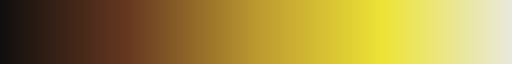

In [15]:
cmap = load_cmap("Acanthurus_triostegus", type='continuous')
cmap

## Default parameters


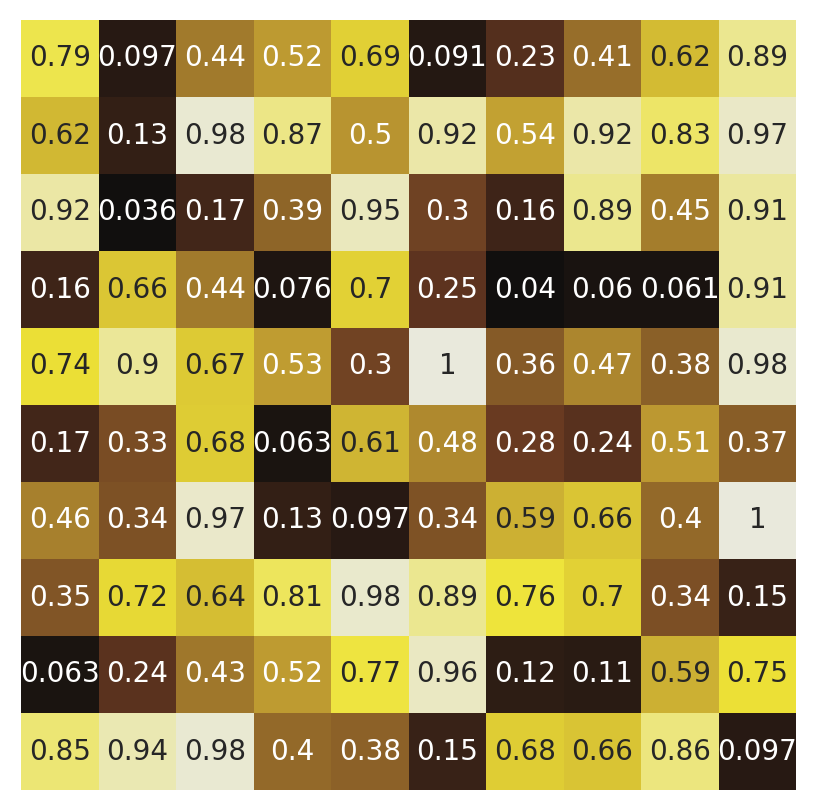

In [57]:
# generate some data
data = np.random.rand(10, 10)
df = pd.DataFrame(data)
df.head()

# plot the data
cmap = load_cmap("Acanthurus_triostegus", type='continuous')
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df, cmap=cmap, ax=ax, annot=True, cbar=False)
ax.set_axis_off()
plt.show()

## Work with categorical data

The `cmap` object functions differently with categorical data. We need to:

- Create a list of integers of the **same length** as the number of categories
- Use the `cmap` object to map these integers to colors

In practice, we establish a **mapping** between the categories and the integers, then utilize the `cmap` object to translate these integers into colors.


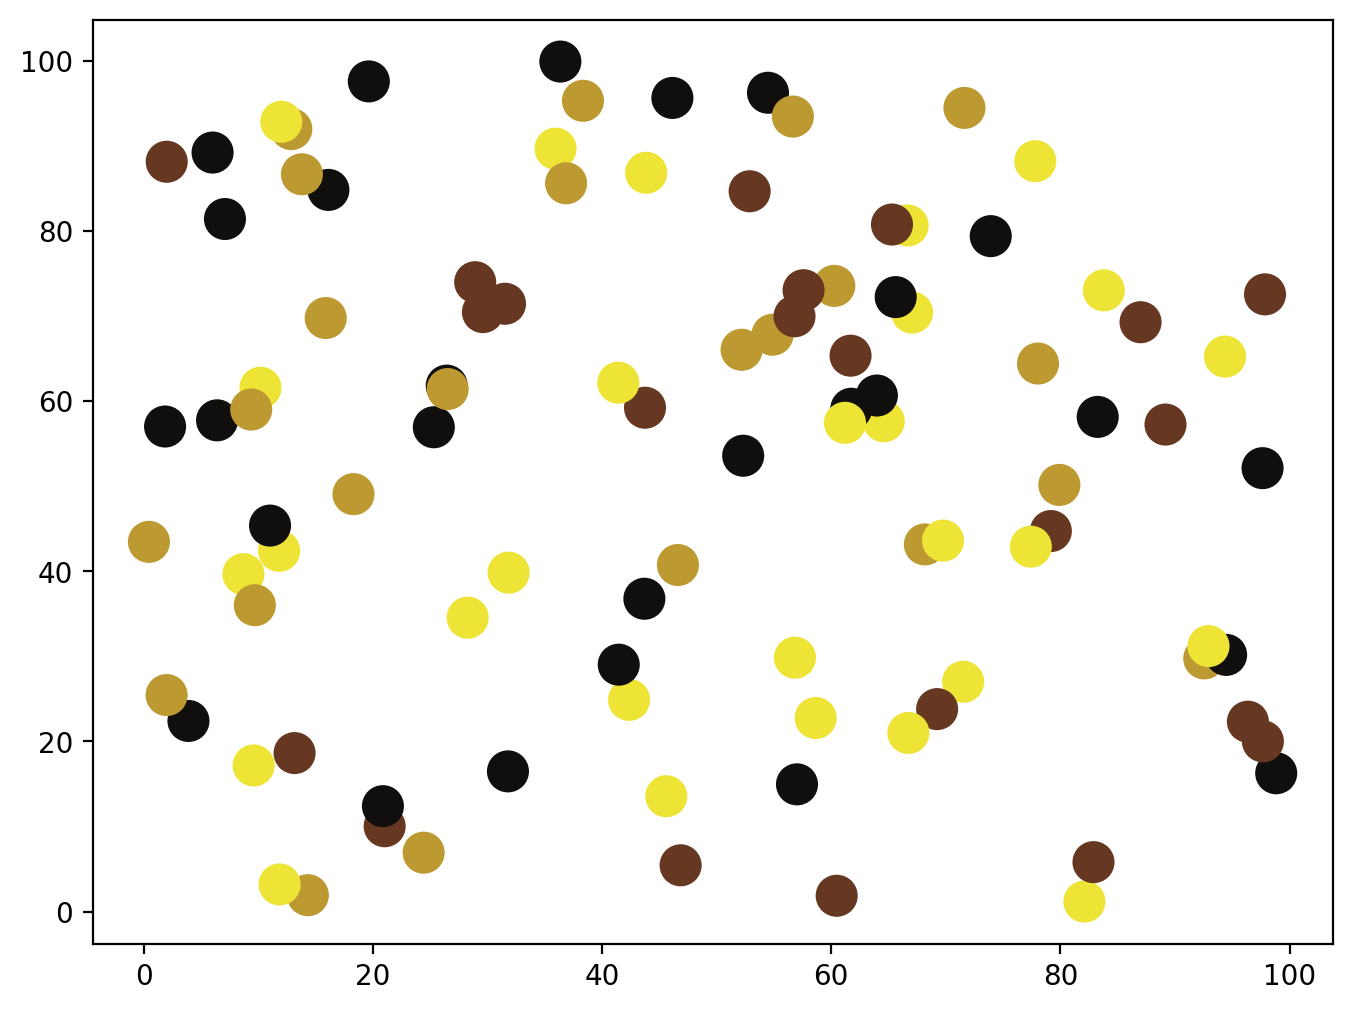

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Generate sample data
np.random.seed(0)
x = np.random.rand(100) * 100
y = np.random.rand(100) * 100
categories = np.random.choice(['A', 'B', 'C', 'D'], size=100)  # Categorical data

# Map categories to numbers
category_mapping = {category: idx for idx, category in enumerate(np.unique(categories))}
category_numbers = [category_mapping[cat] for cat in categories]

# load the colormap
cmap = load_cmap(
   "Acanthurus_triostegus", # Name of the palette
   keep_first_n=len(category_mapping), # Number of colors to keep
)

# Plot the scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, s=200, c=category_numbers, cmap=cmap)
plt.show()


## Set a `vmin` and `vmax` for the colormap

In [**Seaborn**](https://seaborn.pydata.org/), the `vmin` and `vmax` parameters are used to **set the limits** of the colormap. This means the colormap **starts** (with the "lowest" color) at `vmin` and **ends** (with the "highest" color) at `vmax`.

In our case, instead of starting at the **minimum value** (0), we force it to start at **0.4**, ensuring all cells with a value below 0.4 will have the same color. This is useful when we want to **highlight values** above a certain threshold.


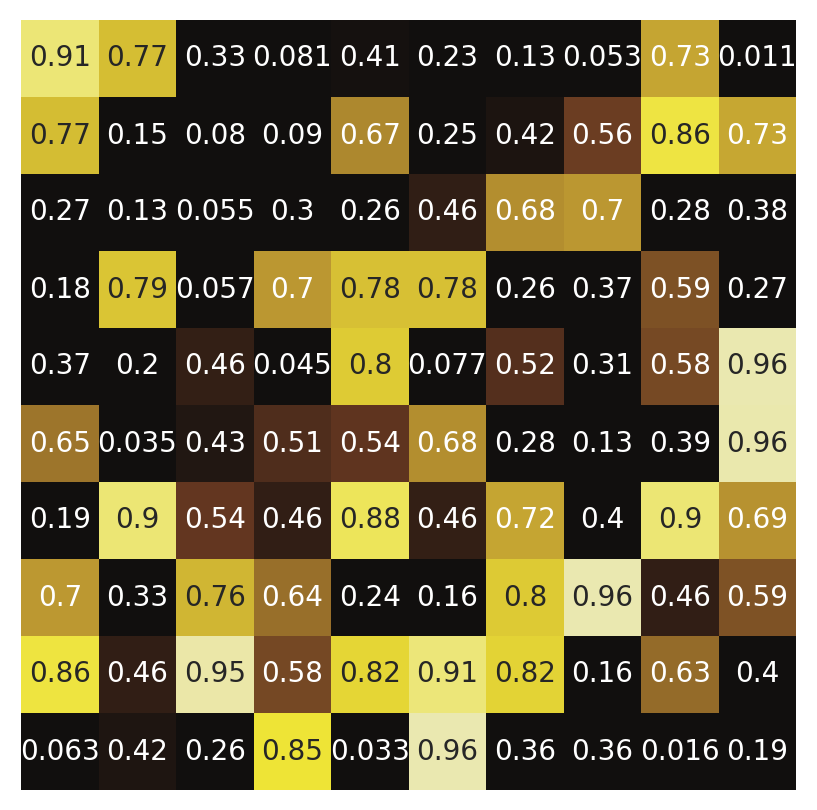

In [33]:
# generate some data
data = np.random.rand(10, 10)
df = pd.DataFrame(data)
df.head()

# plot the data
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df, cmap=cmap, ax=ax, vmin=0.4, vmax=1, annot=True, cbar=False)
ax.set_axis_off()
plt.show()

## Set a `norm` for the colormap

Another case where this might be useful is when your data values range from **70 to 100**. By default, the **"lowest"** color will start at **70** and end at **100**. However, this can create the illusion of a large difference between **70 and 100**, when the actual difference is only **30**. By setting the `vmin` to **0**, the visual difference between **70 and 100** will be less pronounced.

In [**matplotlib**](/matplotlib), the `norm` parameter is used to specify the normalization of the colormap. In our case, we use the `matplotlib.colors.Normalize` function to normalize in two different ways:

- **between 70 and 100**
- **between 0 and 100**

In the example below, both charts display the same information, but the one on the left has a more pronounced difference between the colors, which might give the impression that the difference between the values is larger than it actually is.


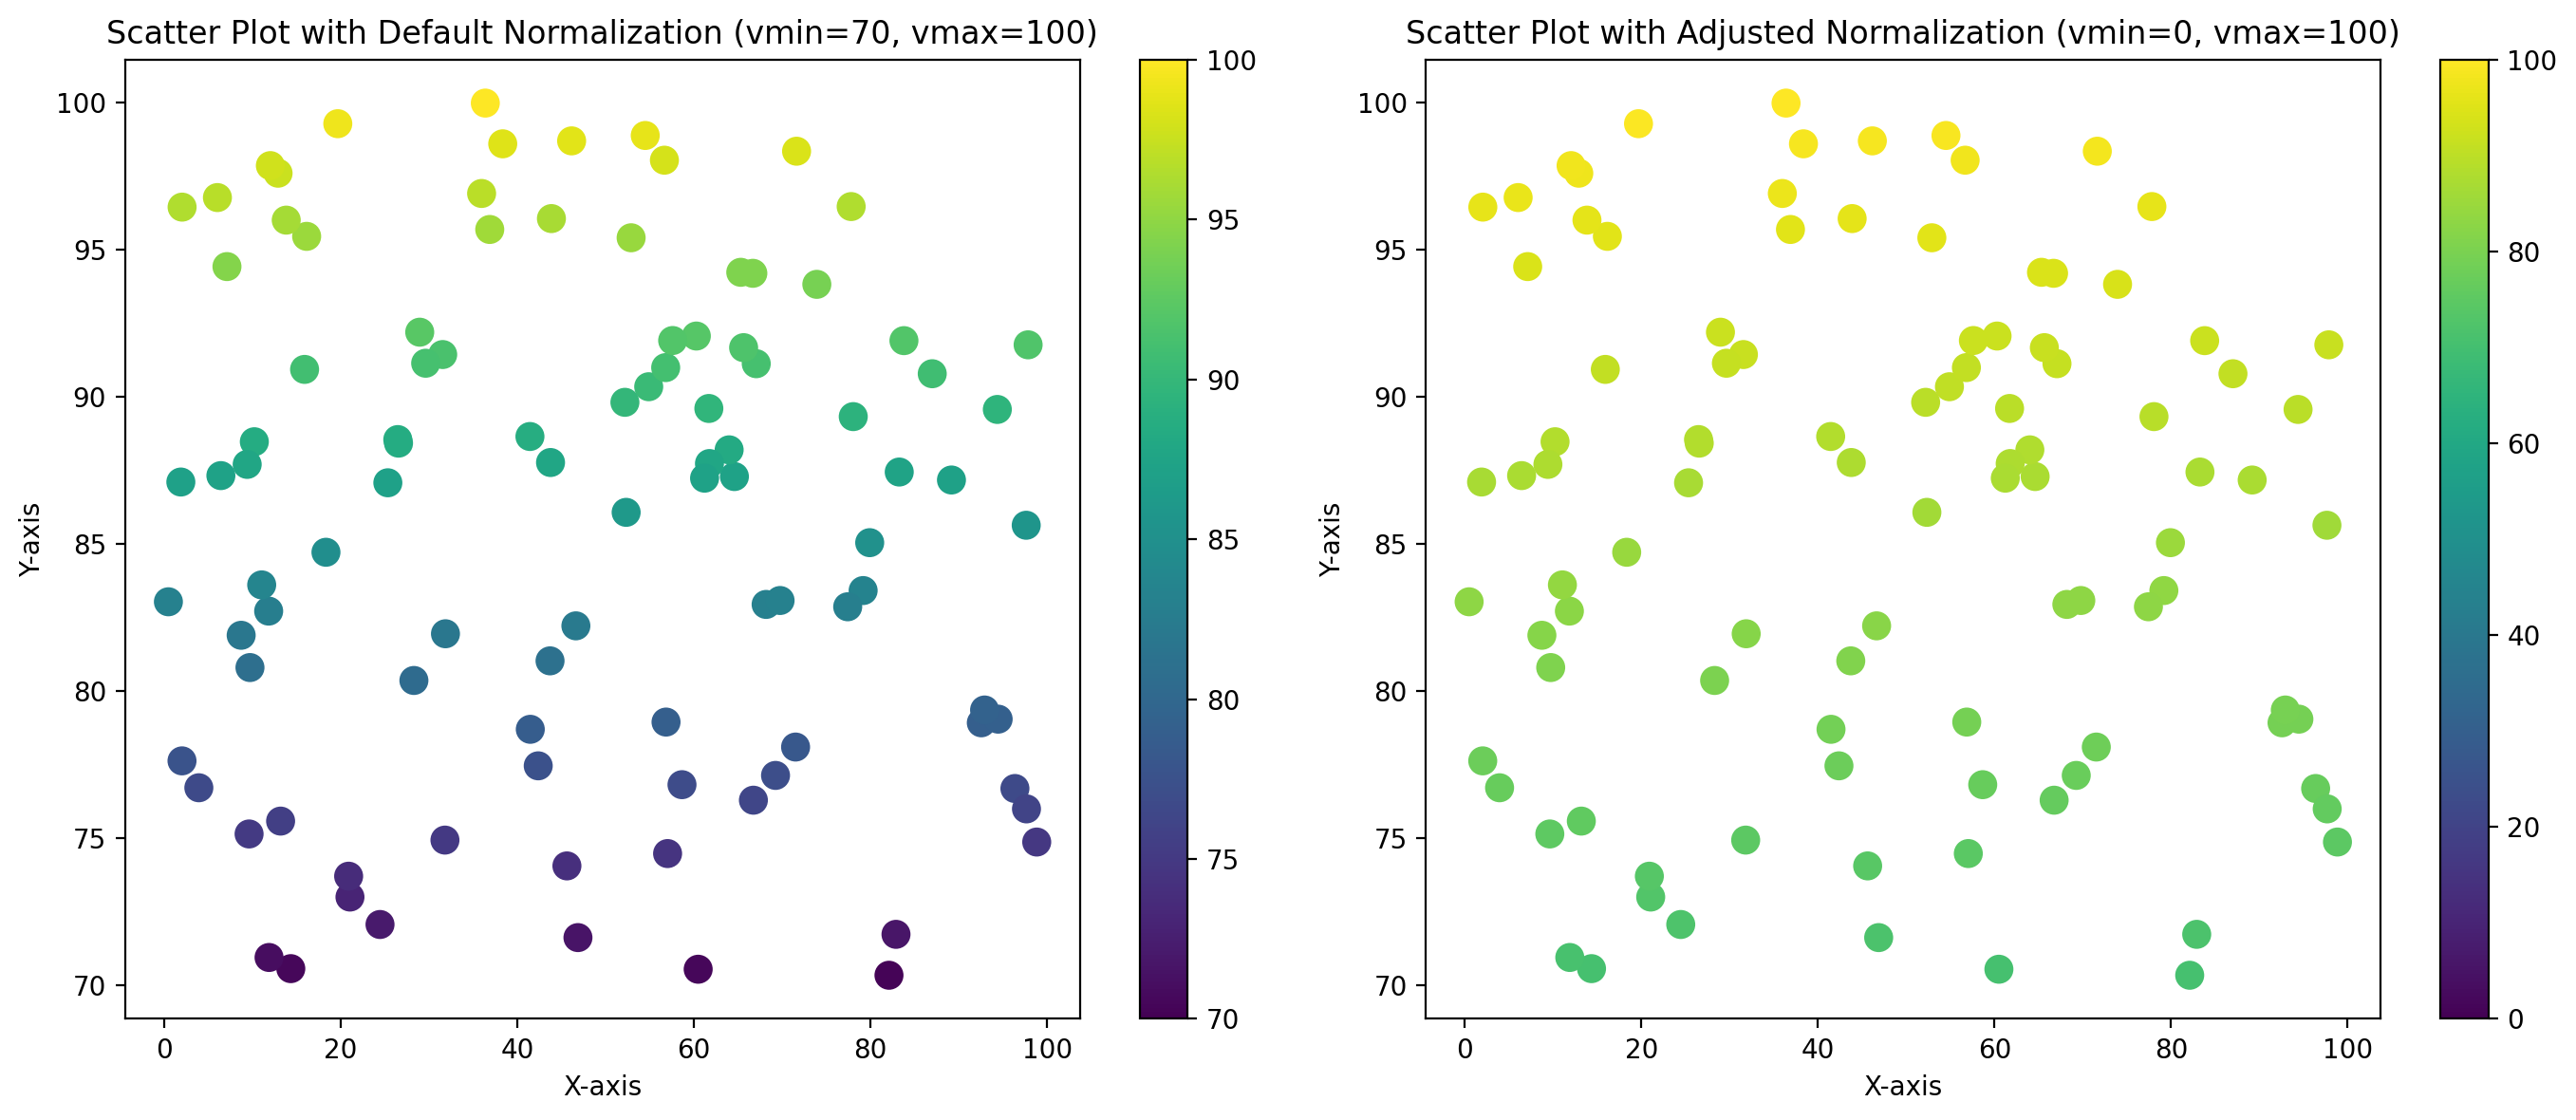

In [31]:
# Generate sample data
np.random.seed(0)
x = np.random.rand(100) * 100
y = 70 + 30 * np.random.rand(100)  # y values range from 70 to 100
colors = y  # Colors are proportional to the y values

# Create two normalization instances
norm_default = mcolors.Normalize(vmin=70, vmax=100)
norm_adjusted = mcolors.Normalize(vmin=0, vmax=100)

# Plot the scatter plots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Default normalization
sc1 = axs[0].scatter(x, y, c=colors, s=100, cmap='viridis', norm=norm_default)
fig.colorbar(sc1, ax=axs[0])
axs[0].set_title('Scatter Plot with Default Normalization (vmin=70, vmax=100)')

# Adjusted normalization
sc2 = axs[1].scatter(x, y, c=colors, s=100, cmap='viridis', norm=norm_adjusted)
fig.colorbar(sc2, ax=axs[1])
axs[1].set_title('Scatter Plot with Adjusted Normalization (vmin=0, vmax=100)')

plt.tight_layout()
plt.show()


## Going further

You might be interested in:

- the [color section of the gallery](/python-colors)
- an example that [uses multiple colormaps in a single chart](/web-multiple-maps)
- how to [create your own colormaps](/available-continuous-palettes)
